### Topological Sort 

In [3]:
import graphviz as gv
import numpy as np
import pandas as pd

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [2]:
%%file tarjan.txt
4
2 5
5
0
3 5 6
6 8

5
2 7

Writing tarjan.txt


In [6]:
%%file tsort.txt

2 7
3 7
6
3 5
6


7

Writing tsort.txt


[8, 7, 6, 5, 4, 3, 2, 1, 0]


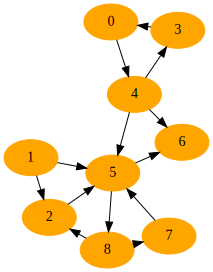

In [8]:
def topoSort(graph):
    n = len(graph)
    visited = [False]*n
    ts = []
    def dfs(v):
        if visited[v]:
            return
        visited[v] = True
        for u in graph[v]:
            if not visited[v]:
                dfs(u)
        ts.append(v)
    
    for v in range(n):
        dfs(v)
    return list(reversed(ts))

graph, _ = readAdjl("tarjan.txt")
print(topoSort(graph))
adjlShow(graph,directed=True)

[6]
[7, 8, 5, 2]
[1]
[3, 4, 0]


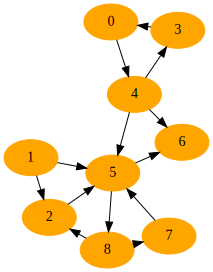

In [16]:
def kosaraju(graph):
    n = len(graph)
    visited = [False]*n
    ts = []
    Grev = [[] for _ in range(n)]
    for v in range(n):
        for u in graph[v]:
            Grev[u].append(v)

    def dfs(v,lista,graph):
        if visited[v]:
            return
        visited[v] = True
        for u in graph[v]:
            if not visited[u]:
                dfs(u,lista,graph)
        lista.append(v)
    for v in range(n):
        dfs(v,ts,Grev)
    visited = [False]*n
    for v in list(reversed(ts)):
        scc = []
        dfs(v,scc,graph)
        if len(scc) > 0:
            print(scc)

graphscc, _ = readAdjl("tarjan.txt")
kosaraju(graphscc)
adjlShow(graphscc,directed=True)